In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory data analysis for Uber

In [78]:
df=pd.read_csv('Uber.csv')

df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


#### To check the number of missing values in the data

In [3]:
df.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

#### to check for datatypes

In [4]:
df.dtypes 

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

#### Change date from obeject to date

In [5]:
from datetime import datetime 

In [156]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'], errors = 'coerce')

In [157]:
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'], errors = 'coerce')

In [158]:
df.dtypes
#to check if type has been changed from object to date
#there is a slight difference from single date conversion i.e pd.to_datetime() 
#then if multiple it would be pd[['','']].apply(pd.to_datetime)

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
MONTHS                 object
DAY                    object
START_TIME             object
dtype: object

#### to check the unique values under the category column

In [12]:
df['CATEGORY*'].unique() 

array(['Business', 'Personal', nan], dtype=object)

#### visualization of Categories in Uber

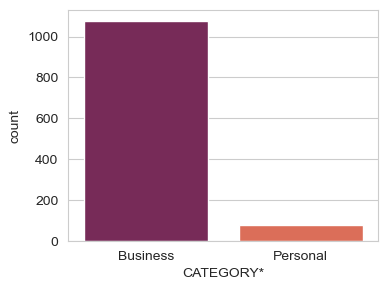

In [13]:
plt.figure(figsize = (4, 3))
sns.set_style('whitegrid')
sns.countplot(data = df, x = 'CATEGORY*', palette = 'rocket')
plt.show()

In [14]:
df.agg(['max'])

C:\Users\OMOLADE ADEFUNKE\AppData\Local\Temp\ipykernel_5812\1032236170.py:1: FutureWarning: ['CATEGORY*', 'START*', 'STOP*', 'PURPOSE*'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.agg(['max'])


,START_DATE*,END_DATE*,MILES*
max,2016-12-31 22:08:00,2016-12-31 23:51:00,12204.7


In [151]:
miles = df['MILES*'].describe()

miles

count     1156.000000
mean        21.115398
std        359.299007
min          0.500000
25%          2.900000
50%          6.000000
75%         10.400000
max      12204.700000
Name: MILES*, dtype: float64

In [152]:
print (f"People travel as far as {miles[7]} miles using uber")

People travel as far as 12204.7 miles using uber


In [154]:
df['START_TIME'] = df['START_DATE*'].dt.time

df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,MONTHS,DAY,START_TIME
0,2016-01-01 21:11:00,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,January,Friday,21:11:00
1,2016-01-02 01:25:00,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,January,Saturday,01:25:00
2,2016-01-02 20:25:00,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,January,Saturday,20:25:00
3,2016-01-05 17:31:00,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,January,Tuesday,17:31:00
4,2016-01-06 14:42:00,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,January,Wednesday,14:42:00


In [159]:
df['STOP_TIME'] = df['END_DATE*'].dt.time

df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,MONTHS,DAY,START_TIME,STOP_TIME
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,January,Friday,21:11:00,21:17:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,January,Saturday,01:25:00,01:37:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,January,Saturday,20:25:00,20:38:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,January,Tuesday,17:31:00,17:45:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,January,Wednesday,14:42:00,15:49:00


#### to get the hour most people take uber to their destinations

In [160]:
hour = df['START_TIME'].describe()

hour

count         1155
unique         689
top       17:50:00
freq             6
Name: START_TIME, dtype: object

In [161]:
print(f"The hour most people take uber to their destinations is {hour[2]}")

The hour most people take uber to their destinations is 17:50:00


In [32]:
df["Hours"] = df["START_DATE*"].dt.hour

df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,START_TIME,STOP_TIME,Hours
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21:11:00,21:17:00,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,01:25:00,01:37:00,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20:25:00,20:38:00,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17:31:00,17:45:00,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14:42:00,15:49:00,14.0


#### Visualizing the number of Trips per Hour

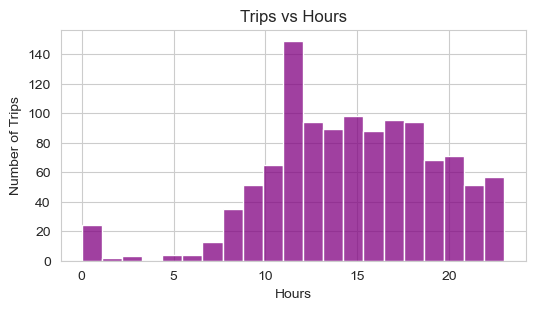

In [40]:
plt.figure(figsize = (6, 3))
sns.histplot(data = df, x = "Hours", color = 'purple')
plt.title('Trips vs Hours')
plt.ylabel('Number of Trips')
sns.set_style('whitegrid')
plt.show()

#### Purpose of the trips

In [44]:
df['PURPOSE*'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

#### Which day has the highest number of trips

In [83]:
df['DAY'] = df['START_DATE*'].dt.strftime('%A')#to get days of the week in words inside of number like daysofweek
df[:5]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,MONTHS,DAY
0,2016-01-01 21:11:00,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,January,Friday
1,2016-01-02 01:25:00,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,January,Saturday
2,2016-01-02 20:25:00,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,January,Saturday
3,2016-01-05 17:31:00,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,January,Tuesday
4,2016-01-06 14:42:00,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,January,Wednesday


In [84]:
Highest_day = df['DAY'].value_counts().idxmax()
Highest_day 

'Friday'

In [85]:
print(f"The day with the highest number of trips is day {Highest_day}")

The day with the highest number of trips is day Friday


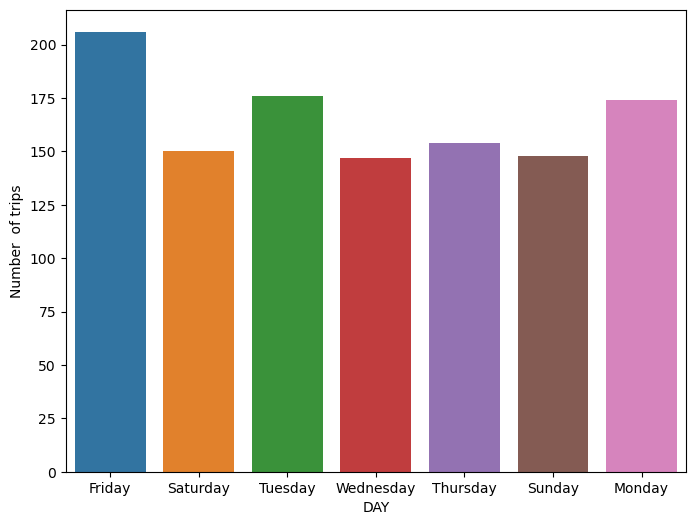

In [88]:
#visualize the days
plt.figure(figsize = (8,6))
sns.countplot(data = df, x = 'DAY')
plt.ylabel('Number  of trips')
plt.show()

#### What are the numbers of trips per each day

In [168]:
day_count = df['DAY'].value_counts()

day_count

Friday       206
Tuesday      176
Monday       174
Thursday     154
Saturday     150
Sunday       148
Wednesday    147
Name: DAY, dtype: int64

In [166]:
df.groupby('DAY').describe()

MILES*                                                       
           count       mean        std  min    25%   50%     75%    max
DAY                                                                    
Friday     206.0  12.597087  29.967174  0.7  3.125  7.50  10.975  310.3
Monday     174.0   7.973563   7.737014  0.7  3.125  5.30   9.900   46.9
Saturday   150.0  13.175333  25.462477  0.6  3.100  6.15  10.400  174.2
Sunday     148.0  11.462162  25.802601  0.6  2.700  6.10   9.900  195.9
Thursday   154.0  11.805195  21.816582  0.7  2.825  6.10  12.875  195.3
Tuesday    176.0   8.418750  15.988558  0.5  2.800  5.70   9.725  195.6
Wednesday  147.0   8.502721  13.358605  0.5  2.100  4.90   9.900  103.0

In [175]:
print(f'''The number of trips on Mondays were {day_count[2]}, Tuesdays were {day_count[1]}, Wednesdays were {day_count[6]}, 
Thursdays were {day_count[3]}, Fridays were {day_count[0]}, Saturdays were {day_count[4]} while Sundays, {day_count[5]}''')

The number of trips on Mondays were 174, Tuesdays were 176, Wednesdays were 147, 
Thursdays were 154, Fridays were 206, Saturdays were 150 while Sundays, 148


#### What are the trips in the months

In [80]:
df['MONTHS'] = df['START_DATE*'].dt.strftime('%B')

df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,MONTHS
0,2016-01-01 21:11:00,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,January
1,2016-01-02 01:25:00,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN,January
2,2016-01-02 20:25:00,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,January
3,2016-01-05 17:31:00,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting,January
4,2016-01-06 14:42:00,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,January


In [177]:
month_trips = df['MONTHS'].value_counts()
month_trips

December     146
August       133
November     122
February     115
March        113
July         112
June         108
October      106
January       61
April         54
May           49
September     36
Name: MONTHS, dtype: int64

In [179]:
print(f'''The trips made in `December` were  {month_trips[0]}, that of `August` were {month_trips[1]}, `November` were {month_trips[2]}, `February` were {month_trips[3]},`March` were {month_trips[4]}, `July` were {month_trips[5]}. Those of `June` were {month_trips[6]}, `October` were {month_trips[7]}, `January` were {month_trips[8]}, `April` were {month_trips[9]}, `May` were {month_trips[10]}, and `September` were {month_trips[11]}''')

The trips made in `December` were  146, that of `August` were 133, `November` were 122, `February` were 115,`March` were 113, `July` were 112. Those of `June` were 108, `October` were 106, `January` were 61, `April` were 54, `May` were 49, and `September` were 36


#### Where do people board from most

In [103]:
df['START*'].value_counts().idxmax()

print(f"{df['START*'].value_counts().idxmax()} is where people board from the most")

Cary is where people board from the most


## Exploratory data analysis for Indian Startups

In [192]:
df2=pd.read_csv('investment.csv')

df2.head()

,Unnamed: 0,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks,yearmonth
0,0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,NaN,202001
1,1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,NaN,202001
2,2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,NaN,202001
3,3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,NaN,202001
4,4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,NaN,202001


In [196]:
df2.drop('Remarks',axis = 1, inplace=True)
df2.sample()

,Unnamed: 0,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
2197,2197,2198,02/11/2015,Twigly,Online Food Ordering & Delivery platform,NaN,Gurgaon,"Amit Gupta, Sahil Barua, Mukul Singhal, Tracxn...",Seed Funding,200000.0,201511


In [197]:
df2.drop('Unnamed: 0',axis = 1, inplace=True)
df2.sample()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
759,760,19/06/2017,DarwinBox,Technology,Enterprise human resources management platform,Hyderabad,"Lightspeed India Partners, Endiya Partners, 3o...",Private Equity,4000000.0,201706


In [198]:
df2.dtypes

SNo                   int64
Date                 object
StartupName          object
IndustryVertical     object
SubVertical          object
City                 object
InvestorsName        object
InvestmentType       object
AmountInUSD         float64
yearmonth             int64
dtype: object

In [199]:
df2['Date'] = pd.to_datetime(df2['Date']) #convert date to datetime

df2.dtypes

C:\Users\OMOLADE ADEFUNKE\AppData\Local\Temp\ipykernel_12964\2374928928.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2['Date'] = pd.to_datetime(df2['Date']) #convert date to datetime


SNo                          int64
Date                datetime64[ns]
StartupName                 object
IndustryVertical            object
SubVertical                 object
City                        object
InvestorsName               object
InvestmentType              object
AmountInUSD                float64
yearmonth                    int64
dtype: object

In [200]:
df2['yearmonth']

df2.sample()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth
2452,2453,2015-09-24,Quintype,Data Driven Publishing platform,NaN,Bangalore,Raghav Bahl,Private Equity,3300000.0,201509


In [201]:
df2['year'] = df2['Date'].dt.year

df2.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth,year
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,202001,2020
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,202001,2020
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,202001,2020
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,202001,2020
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,202001,2020


In [202]:
df2['month'] = df2['Date'].dt.strftime('%B') #this is to extract as word not number

df2.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth,year,month
0,1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,202001,2020,September
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,202001,2020,January
2,3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,202001,2020,September
3,4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,202001,2020,February
4,5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,202001,2020,February


In [203]:
df2.dtypes

SNo                          int64
Date                datetime64[ns]
StartupName                 object
IndustryVertical            object
SubVertical                 object
City                        object
InvestorsName               object
InvestmentType              object
AmountInUSD                float64
yearmonth                    int64
year                         int64
month                       object
dtype: object

In [204]:
df2['AmountInUSD'] = df2['AmountInUSD'].astype(int)

df2.sample()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,yearmonth,year,month
1187,1188,2016-01-11,PickMyLaundry,Consumer Internet,On-Demand Washing & Dry Cleaning Services,New Delhi,"Kedar Lele, GHV Accelerator",Seed Funding,200000,201611,2016,January


In [143]:
df2.groupby('City')['year', 'AmountInUSD'].max()

C:\Users\OMOLADE ADEFUNKE\AppData\Local\Temp\ipykernel_12964\191818712.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df2.groupby('City')['year', 'AmountInUSD'].max()


,year,AmountInUSD
City,,
Agra,2016,-999
Ahemadabad,2018,6230000
Ahemdabad,2018,-999
Ahmedabad,2018,32000000
Amritsar,2019,300000
...,...,...
Udaipur,2018,500000
Udupi,2017,12000000
Uttar Pradesh,2017,-999


#### How Does the Funding Ecosystem changes with respect to Time?

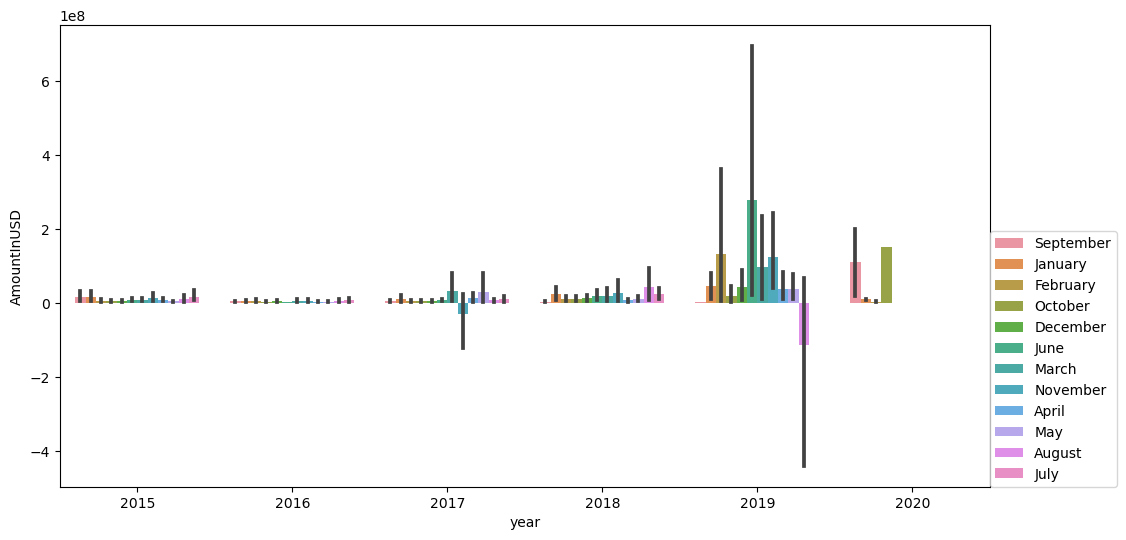

In [90]:
plt.figure(figsize = (12,6))
sns.barplot(data = df2, x = 'year',  y = 'AmountInUSD', hue = 'month')
plt.legend(loc = [1, 0])
plt.show()

In [50]:
print("From the barplot above, we can see that funding gradually increased across the years until 2019 where we had very high funding ecosystem in June and very low funding in August")

From the barplot above, we can see that funding gradually increased across the years until 2019 where we had very high funding ecosystem in June and very low funding in August


#### What is the General Amount that Startups get in India?

In [206]:
amount = df2['AmountInUSD'].describe()

amount

count    3.040000e+03
mean     9.747102e+06
std      8.348004e+07
min     -2.147484e+09
25%     -9.990000e+02
50%      5.000000e+05
75%      4.000000e+06
max      1.510950e+09
Name: AmountInUSD, dtype: float64

In [212]:
print(f"The General Amount Startups get in India is {amount[0]}")

The General Amount Startups get in India is 3040.0


#### Which Kind of Industries are more preferred for Startups?

In [99]:
df2['IndustryVertical'].value_counts()[:5]

Consumer Internet    941
Technology           478
eCommerce            186
Healthcare            70
Finance               62
Name: IndustryVertical, dtype: int64

In [103]:
print(f"The most preferred Kind of Industry for Startups with {df2['IndustryVertical'].value_counts()[0]} number of occurences is 'Consumer Internet'")

The most preferred Kind of Industry for Startups with 941 number of occurences is 'Consumer Internet'


#### Does Location also play a role, In determining the Growth of a Startup?

In [111]:
df2['City'].describe()

count          2864
unique          107
top       Bangalore
freq            701
Name: City, dtype: object

In [213]:
print(f'''Most likely where a Startup is located is a determining factor to its growth. This is because out of {df2['City'].describe()[1]} unique locations,
many Startups were sighted at {df2['City'].describe()[2]} for better growth''')

Most likely where a Startup is located is a determining factor to its growth. This is because out of 107 unique locations,
many Startups were sighted at Bangalore for better growth


#### Who plays the main role in Indian Startups Ecosystem?

In [118]:
df2['InvestorsName'].describe()

count                      3020
unique                     2408
top       Undisclosed Investors
freq                         39
Name: InvestorsName, dtype: object

In [124]:
print(f"Investors play the main role in India Startups. From the data provided, {df2['InvestorsName'].describe()[2]} are the major role players")

Investors play the main role in India Startups. From the data provided, Undisclosed Investors are the major role players


#### What are the different Types of Funding for Startups?

In [214]:
df2['InvestmentType'].unique()

print(f"The different types of funding for Startups include {df2['InvestmentType'].unique()}")

The different types of funding for Startups include ['Private Equity Round' 'Series C' 'Series B' 'Pre-series A' 'Seed Round'
 'Series A' 'Series D' 'Seed' 'Series G' 'Series H' 'Venture'
 'Debt Funding' 'Seed Funding' nan 'Funding Round' 'Corporate Round'
 'Maiden Round' 'pre-series A' 'Seed Funding Round' 'Single Venture'
 'Venture Round' 'Series F' 'Pre-Series A' 'Angel' 'Series J'
 'Angel Round' 'pre-Series A' 'Venture - Series Unknown' 'Bridge Round'
 'Private Equity' 'Debt and Preference capital' 'Inhouse Funding'
 'Seed/ Angel Funding' 'Debt' 'Pre Series A' 'Equity' 'Debt-Funding'
 'Mezzanine' 'Series B (Extension)' 'Equity Based Funding' 'Series E'
 'Private Funding' 'Seed / Angel Funding' 'Seed/Angel Funding'
 'Seed funding' 'Seed / Angle Funding' 'Angel / Seed Funding' 'Private'
 'Structured Debt' 'Term Loan' 'PrivateEquity' 'Angel Funding'
 'Seed\\\\nFunding' 'Private\\\\nEquity' 'Crowd funding' 'Crowd Funding']
